In [3]:
# prompt: i want to attach data from kaggle

!pip install kaggle

# Assuming you have your kaggle.json file in the correct location
# If not, upload it to the current working directory and then run the below command
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c car-price-prediction-khazani-ahmed
!unzip car-price-prediction-khazani-ahmed.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open car-price-prediction-khazani-ahmed.zip, car-price-prediction-khazani-ahmed.zip.zip or car-price-prediction-khazani-ahmed.zip.ZIP.


In [1]:
# prompt: i want to load it from my drive with name train 1
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd



Mounted at /content/drive


In [103]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(train_df.head())

   car_ID  symboling                CarName fueltype aspiration doornumber  \
0      67          0          mazda rx-7 gs   diesel        std       four   
1     112          0            peugeot 504      gas        std       four   
2     154          0  toyota corona hardtop      gas        std       four   
3      97          1           nissan latio      gas        std       four   
4      39          0       honda civic 1300      gas        std        two   

     carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0      sedan        rwd          front      104.9  ...         134   
1      sedan        rwd          front      107.9  ...         120   
2      wagon        fwd          front       95.7  ...          92   
3      sedan        fwd          front       94.5  ...          97   
4  hatchback        fwd          front       96.5  ...         110   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0         idi       3.43    3

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            164 non-null    int64  
 1   symboling         164 non-null    int64  
 2   CarName           164 non-null    object 
 3   fueltype          164 non-null    object 
 4   aspiration        164 non-null    object 
 5   doornumber        164 non-null    object 
 6   carbody           164 non-null    object 
 7   drivewheel        164 non-null    object 
 8   enginelocation    164 non-null    object 
 9   wheelbase         164 non-null    float64
 10  carlength         164 non-null    float64
 11  carwidth          164 non-null    float64
 12  carheight         164 non-null    float64
 13  curbweight        164 non-null    int64  
 14  enginetype        164 non-null    object 
 15  cylindernumber    164 non-null    object 
 16  enginesize        164 non-null    int64  
 1

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [80]:
train_df['cylindernumber'].unique()
train_df['cylindernumber'] = train_df['cylindernumber'].str.strip()

In [81]:
train_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
1,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
2,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
3,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
4,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0


**Prices are often right-skewed, so log-transforming can stabilize variance and improve performance:**

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

# 1. Drop irrelevant columns
train_df = train_df.drop(columns=['CarName', 'carbody', 'enginelocation', 'enginetype', 'fuelsystem'])

# 2. Feature engineering function
def custom_feature_engineering(X):
    X = X.copy()

    mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

    if 'doornumber' in X.columns:
        X['doornumber'] = X['doornumber'].map(mapping)

    if 'cylindernumber' in X.columns:
        X['cylindernumber'] = X['cylindernumber'].map(mapping)

    return X

feature_engineering = FunctionTransformer(custom_feature_engineering)

# 3. Define column types
categorical_cols = ['fueltype', 'aspiration', 'drivewheel','doornumber', 'cylindernumber']
numeric_cols = ['wheelbase', 'enginesize', 'boreratio', 'stroke',
                'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# 4. Pipelines for preprocessing
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, categorical_cols),
    ('num', num_pipeline, numeric_cols)
])

# 5. Full pipeline with Ridge regression
full_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# 6. Split data
X = train_df.drop('price', axis=1)
y = np.log1p(train_df['price'])  # log(1 + price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
full_pipeline.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = full_pipeline.predict(X_test)

# Inverse transform predictions and true labels
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Evaluation
print("R² score:", r2_score(y_test_exp, y_pred_exp))
print("MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))


R² score: 0.8724081619670742
MAE: 1550.8066274146279
RMSE: 2345.4059550121765


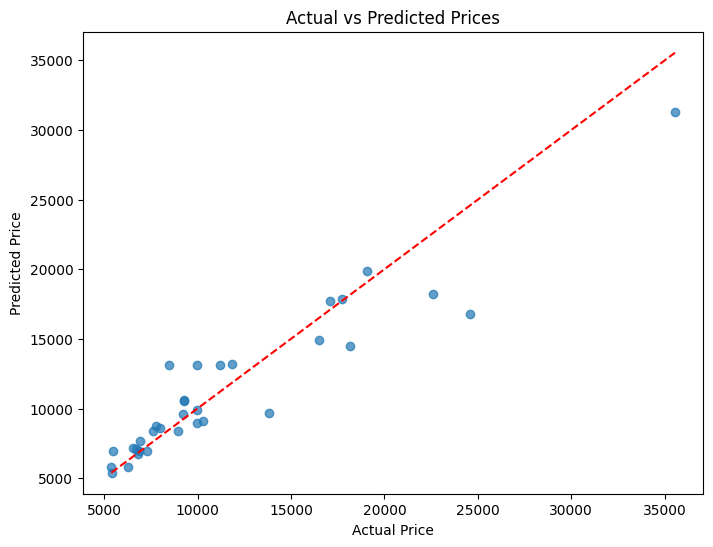

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.7)
plt.plot([y_test_exp.min(), y_test_exp.max()],
         [y_test_exp.min(), y_test_exp.max()],
         'r--')  # diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

it means that price may be different in raange of one thousand

In [83]:
from sklearn.model_selection import GridSearchCV

# Define a range of alphas to try
alpha_values = {'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Grid search
grid_search = GridSearchCV(
    full_pipeline,
    param_grid=alpha_values,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

print("Best alpha:", grid_search.best_params_)
print("R² score:", r2_score(y_test_exp, y_pred_exp))
print("MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best alpha: {'model__alpha': 10.0}
R² score: 0.8681033094791357
MAE: 1667.4555265189715
RMSE: 2384.643851196402


In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# Update preprocessor with polynomial numeric pipeline
preprocessor_poly = ColumnTransformer(transformers=[
    ('cat', cat_pipeline, categorical_cols),
    ('num', poly_num_pipeline, numeric_cols)
])

# Full pipeline
full_pipeline_poly = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ('preprocessor', preprocessor_poly),
    ('model', Ridge(alpha=1.0))  # Can tune alpha here too
])


In [86]:
# 6. Split data
X = train_df.drop('price', axis=1)
y = np.log1p(train_df['price'])  # log(1 + price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
full_pipeline_poly.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = full_pipeline_poly.predict(X_test)

# Inverse transform predictions and true labels
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Evaluation
print("R² score:", r2_score(y_test_exp, y_pred_exp))
print("MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))


R² score: 0.8658654068751079
MAE: 1572.9395771195263
RMSE: 2404.788989212408


In [93]:
from sklearn.feature_selection import SelectKBest, f_regression

# Add feature selector into your pipeline
from sklearn.pipeline import make_pipeline

feature_selector = SelectKBest(score_func=f_regression, k='all')  # Try changing 'all' to a number like 10

full_pipeline_fs = Pipeline(steps=[
    ('feature_engineering', feature_engineering),
    ('preprocessor', preprocessor_poly),
    ('feature_selection', feature_selector),
    ('model', Ridge(alpha=10))  # You can reapply tuning later
])
# 6. Split data
X = train_df.drop('price', axis=1)
y = np.log1p(train_df['price'])  # log(1 + price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
full_pipeline_fs.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = full_pipeline_fs.predict(X_test)

# Inverse transform predictions and true labels
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Evaluation
print("R² score:", r2_score(y_test_exp, y_pred_exp))
print("MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))


R² score: 0.879337469271323
MAE: 1525.8056844559903
RMSE: 2280.829342819224
